In [2]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [4]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [5]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [6]:
euro22 =pd.read_pickle('euro22.pkl')
euro22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26002 entries, 0 to 26001
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         26002 non-null  int64  
 1   pass_angle                     26002 non-null  float64
 2   pass_length                    26002 non-null  float64
 3   pass_recipient                 26002 non-null  object 
 4   possession_team                26002 non-null  object 
 5   possession_team_id             26002 non-null  int64  
 6   player                         26002 non-null  object 
 7   player_id                      26002 non-null  float64
 8   match_id                       26002 non-null  int64  
 9   pass_outcome_Complete          26002 non-null  uint8  
 10  pass_outcome_Incomplete        26002 non-null  uint8  
 11  pass_outcome_Injury Clearance  26002 non-null  uint8  
 12  pass_outcome_Out               26002 non-null 

## PCA

In [111]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

In [112]:
euro22.period = euro22.period.astype('float64')

In [113]:
# features to use
eupasses = euro22[(euro22['possession_team_id'] == 865) & 
                  #(euro22['period'] == 1) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [114]:
eupasses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 26001
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period                   2693 non-null   float64
 1   pass_angle               2693 non-null   float64
 2   pass_length              2693 non-null   float64
 3   start_x                  2693 non-null   float64
 4   start_y                  2693 non-null   float64
 5   end_x                    2693 non-null   float64
 6   end_y                    2693 non-null   float64
 7   pass_height_Ground Pass  2693 non-null   uint8  
 8   pass_height_High Pass    2693 non-null   uint8  
 9   pass_height_Low Pass     2693 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 176.2 KB


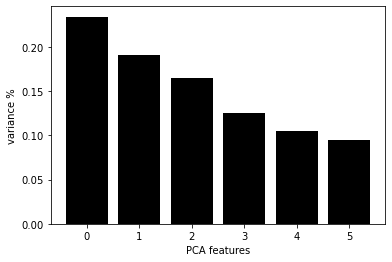

In [119]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(eupasses)
# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

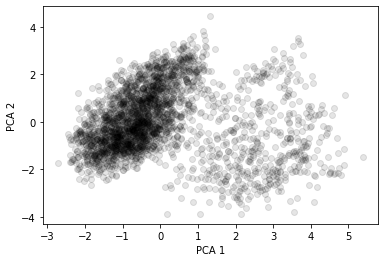

In [120]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [90]:
X = np.array(eupasses)

In [91]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [92]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X))

In [93]:
N_clusters = 20
# X = np.array(eupasses)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(reduced)
cluster_labels = kmeans.predict(reduced)


In [94]:
cluster_centers = kmeans.cluster_centers_

In [95]:
# pulling out passes for analysis by cluster

eupasses['n_cluster'] = cluster_labels
u_labels = np.unique(cluster_labels)

In [96]:
u_labels  = sorted(eupasses['n_cluster'].unique())

In [97]:
u_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [99]:
for i in u_labels:
    plt.scatter(eupasses['n_cluster'][i][0],
                eupasses['n_cluster'][i][1], 
                label = i ,cmap='viridis')

IndexError: invalid index to scalar variable.

### Attempt to cluster with DBScan

In [101]:
eupasses_db = euro22[(euro22['possession_team_id'] == 865) & 
                  #(euro22['period'] == 1) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [102]:
eupasses_db

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
0,1.0,2.938882,25.828860,61.0,40.1,35.7,45.3,1,0,0
2,1.0,-3.068195,13.636715,92.1,7.3,78.5,6.3,0,0,1
3,1.0,2.119346,10.547511,76.6,6.0,71.1,15.0,1,0,0
4,1.0,-2.624105,14.958610,69.7,16.6,56.7,9.2,1,0,0
5,1.0,2.356194,38.042343,57.0,9.4,30.1,36.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
25992,2.0,-0.244979,5.772348,15.2,32.9,20.8,31.5,1,0,0
25993,2.0,-0.530587,40.115460,20.8,31.5,55.4,11.2,1,0,0
25994,2.0,-0.252806,24.787900,56.2,10.6,80.2,4.4,1,0,0
26000,2.0,2.218430,24.200207,42.1,14.2,27.5,33.5,1,0,0


In [103]:
from sklearn.neighbors import NearestNeighbors

In [104]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(eupasses_db)
distances, indices = nbrs.kneighbors(eupasses_db)

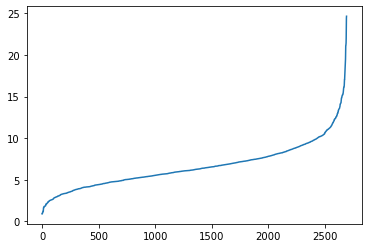

In [105]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [106]:
ss = StandardScaler()
X_scaled = ss.fit_transform(eupasses_db)
X_db = np.array(eupasses_db)
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_db)

DBSCAN(eps=10)

In [107]:
silhouette_score(X_db, dbscan.labels_)

-0.4856689970132163

In [108]:
eupasses_db['n_cluster'] = dbscan.labels_

In [109]:
eupasses_db['n_cluster'].unique()

array([-1,  0,  1,  2, 17,  3,  4, 15, 11, 21, 16, 18, 22,  6,  5,  7,  8,
        9, 10, 12, 20, 14, 13, 19], dtype=int64)

In [110]:
for c in sorted(eupasses_db['n_cluster'].unique()) :
    
    plt.scatter(eupasses_db[eupasses_db['n_cluster'] == c][0],
                eupasses_db[eupasses_db['n_cluster'] == c][1], 
                label = c ,cmap='viridis')
    

# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Keira Walsh made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
    fig.set_facecolor('#22312b')

KeyError: 0

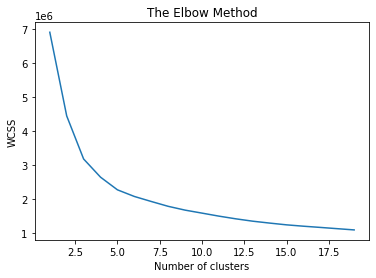

In [63]:
# assessed clusters based on elbow method, however 5 clusters does not provide much insights.
# through trial and error, selected 20 clusters.

X = np.array(eupasses)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# cannot standard scaler because i need the feature points to plot clusters

N_clusters = 20
X = np.array(eupasses)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)


In [65]:
kmeans.cluster_centers_

array([[ 1.57798165e+00,  6.78305021e-01,  1.47326591e+01,
         5.13697248e+01,  1.35866972e+01,  4.97178899e+01,
         1.57949541e+01,  8.34862385e-01,  8.25688073e-02,
         8.25688073e-02],
       [ 1.68421053e+00, -8.10253592e-01,  1.82555307e+01,
         6.51394737e+01,  4.99394737e+01,  6.47177632e+01,
         4.09019737e+01,  9.47368421e-01,  1.97368421e-02,
         3.28947368e-02],
       [ 1.68987342e+00, -3.47966974e-01,  1.56979541e+01,
         4.83658228e+01,  4.32746835e+01,  4.63575949e+01,
         3.85677215e+01,  9.24050633e-01,  2.53164557e-02,
         5.06329114e-02],
       [ 1.64417178e+00,  4.98892374e-01,  1.51826915e+01,
         9.32447853e+01,  1.18085890e+01,  9.68214724e+01,
         1.33693252e+01,  7.85276074e-01,  7.97546012e-02,
         1.34969325e-01],
       [ 1.53488372e+00, -1.20256950e+00,  2.89292758e+01,
         1.05411628e+02,  6.19232558e+01,  1.09520930e+02,
         3.71511628e+01,  2.09302326e-01,  6.51162791e-01,
         1.

In [66]:
eupasses['n_cluster'] = cluster_labels
eupasses['period'].value_counts()

2.0    1260
1.0    1239
3.0     120
4.0      74
Name: period, dtype: int64

In [67]:
eupasses['period']

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
29       1.0
30       1.0
32       1.0
33       1.0
34       1.0
35       1.0
42       1.0
43       1.0
44       1.0
45       1.0
46       1.0
47       1.0
48       1.0
49       1.0
50       1.0
53       1.0
67       1.0
68       1.0
69       1.0
70       1.0
80       1.0
81       1.0
84       1.0
85       1.0
105      1.0
106      1.0
107      1.0
108      1.0
109      1.0
110      1.0
111      1.0
116      1.0
117      1.0
118      1.0
121      1.0
122      1.0
123      1.0
127      1.0
128      1.0
129      1.0
130      1.0
131      1.0
132      1.0
141      1.0
142      1.0
152      1.0
153      1.0
154      1.0
157      1.0
158      1.0
159      1.0
161      1.0
162      1.0
163      1.0
165      1.0
166      1.0
167      1.0
168      1.0
180      1.0
181      1.0
182      1.0
183      1.0

In [68]:
eupasses['n_cluster'].value_counts()

15    236
0     218
13    192
18    180
5     169
14    169
7     168
3     163
2     158
1     152
9     144
8     115
6     114
10    110
17    108
11     81
12     75
19     60
4      43
16     38
Name: n_cluster, dtype: int64

In [69]:
sorted(eupasses['n_cluster'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [70]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [71]:
centroids.iloc[[11,12,19]]

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
11,1.592593,-0.668573,32.157544,34.681481,29.851852,57.290123,13.540741,0.629630,0.283951,0.086420
12,1.626667,0.754705,42.551529,59.392000,44.016000,88.702667,70.697333,0.400000,0.533333,0.066667
19,1.566667,-0.734310,41.208575,59.640000,33.401667,88.515000,9.481667,0.416667,0.566667,0.016667


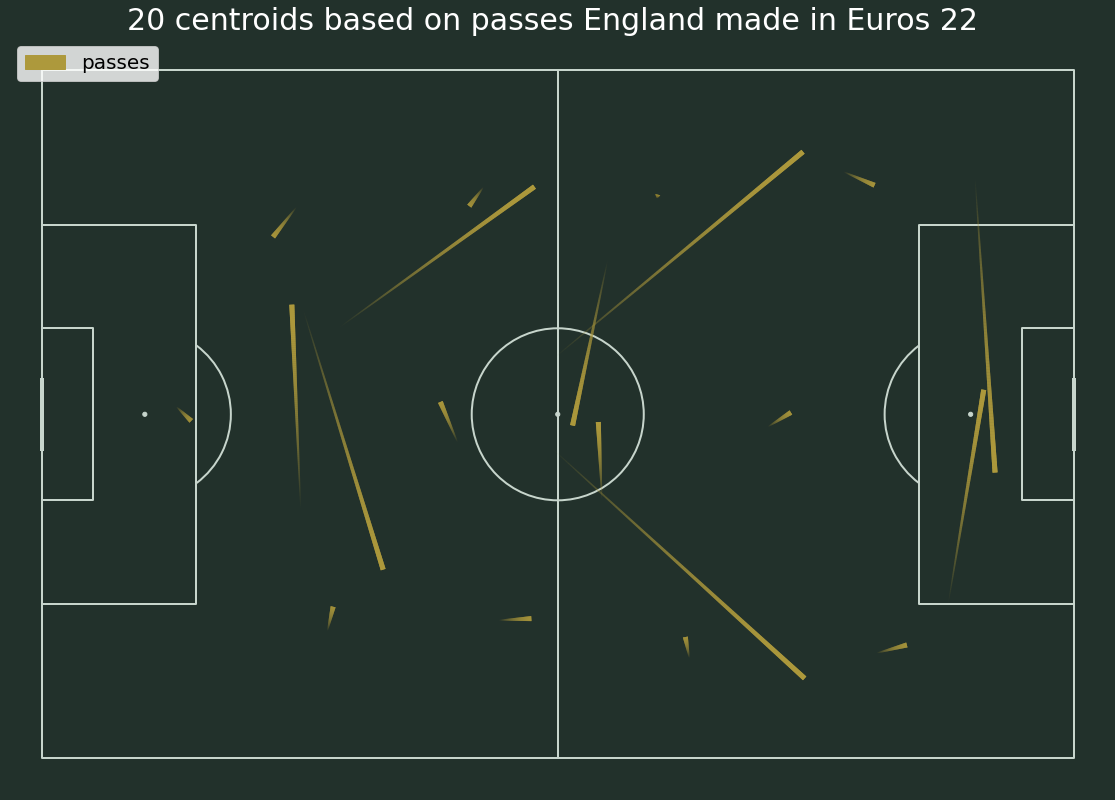

In [72]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'20 centroids based on passes England made in Euros 22 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [73]:
pd.set_option('display.max_rows', None)
eupasses_0 = eupasses[eupasses.n_cluster == 0]
eupasses_0.describe()

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,1.577982,0.678305,14.732659,51.369725,13.586697,49.717890,15.794954,0.834862,0.082569,0.082569,0.0
std,0.676036,1.797024,5.513794,8.656858,7.513463,8.284426,8.564347,0.372159,0.275863,0.275863,0.0
min,1.000000,-3.108272,2.088061,32.700000,0.100000,30.100000,0.500000,0.000000,0.000000,0.000000,0.0
25%,1.000000,-0.817197,11.095328,44.550000,7.525000,43.700000,8.825000,1.000000,0.000000,0.000000,0.0
50%,1.000000,0.964026,14.320252,50.700000,13.850000,49.450000,14.600000,1.000000,0.000000,0.000000,0.0
75%,2.000000,2.395837,17.927839,56.675000,19.075000,55.600000,22.400000,1.000000,0.000000,0.000000,0.0
max,4.000000,3.141593,41.512047,70.400000,34.900000,72.100000,36.300000,1.000000,1.000000,1.000000,0.0


In [74]:
eupasses['n_cluster'].unique()

array([ 2,  3, 15,  0, 10,  6, 12, 13,  1, 11, 14,  7,  9, 19, 16,  5,  8,
       17, 18,  4])

In [75]:
def plot_clusters(df, name):
    n_clusters = eupasses['n_cluster'].nunique()
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)
    
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    for lbl, col in zip(eupasses['n_cluster'].unique(), colors):
        #df_cluster = passes[passes['n_cluster'] == lbl]
        lc1 = pitch.arrows(eupasses[eupasses['n_cluster'] == lbl]['start_x'], 
                    eupasses[eupasses['n_cluster'] == lbl]['start_y'],
                    eupasses[eupasses['n_cluster'] == lbl]['end_x'],
                    eupasses[eupasses['n_cluster'] == lbl]['end_y'],
                    width=2,headwidth=6, headlength=5, headaxislength=12,color=col,ax=ax,
                       label=lbl)

    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=20)
    plt.show()

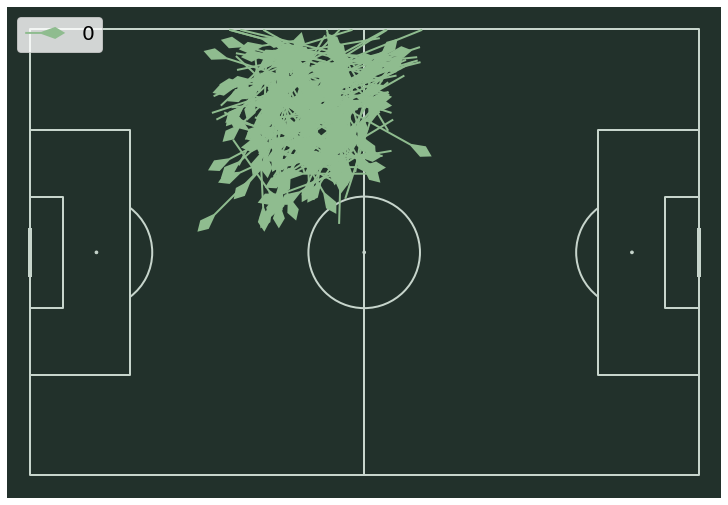

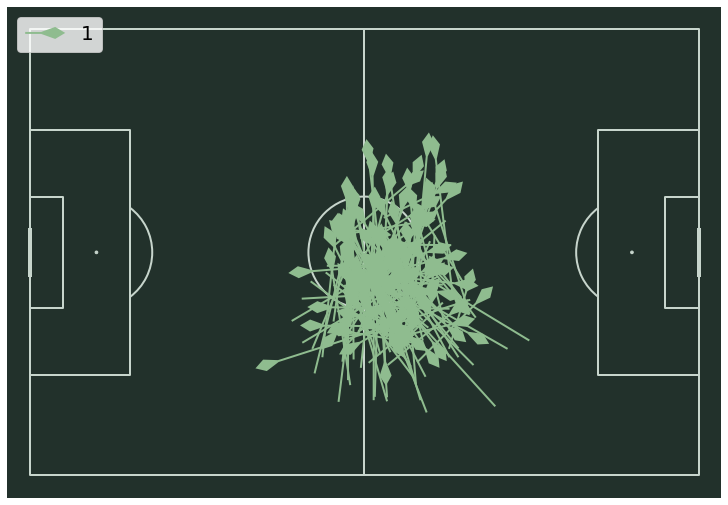

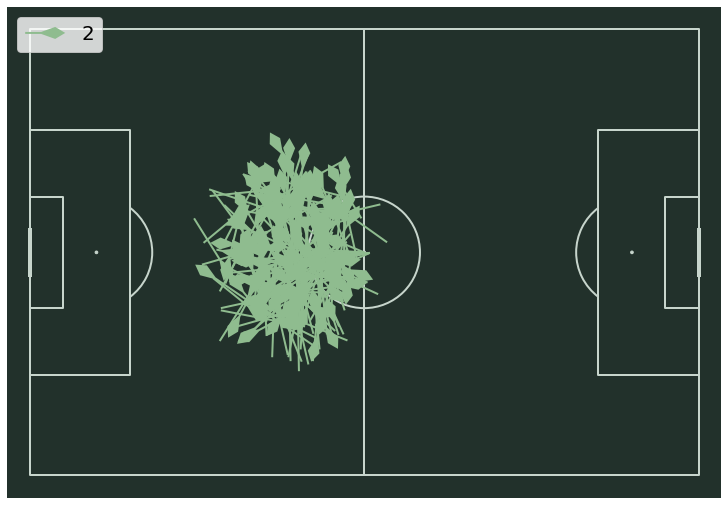

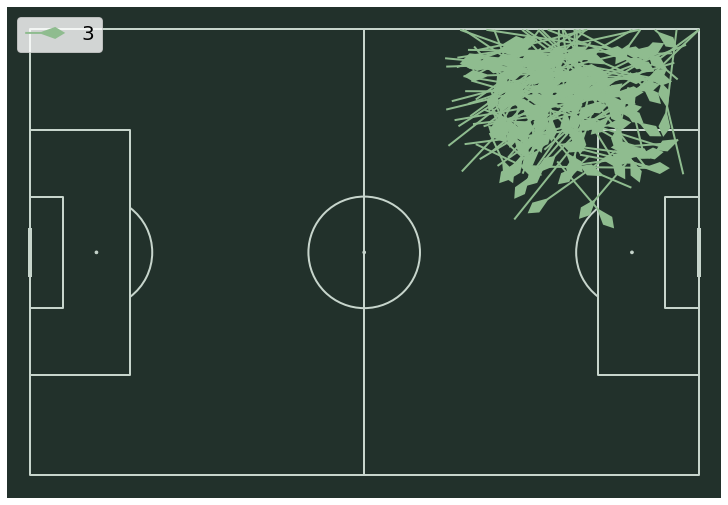

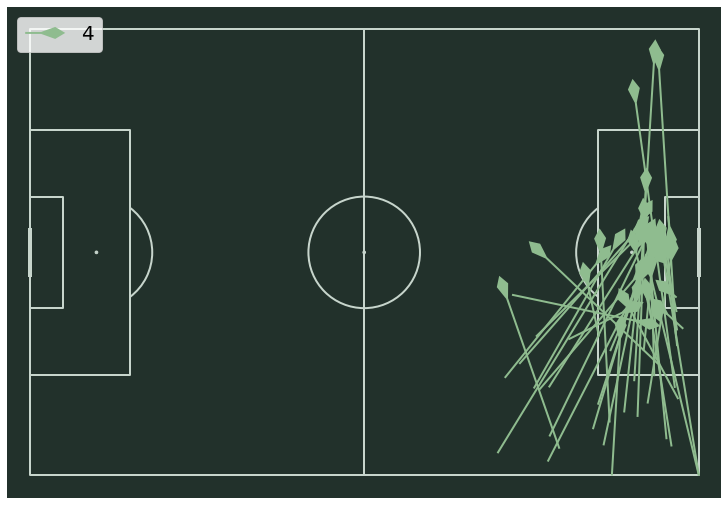

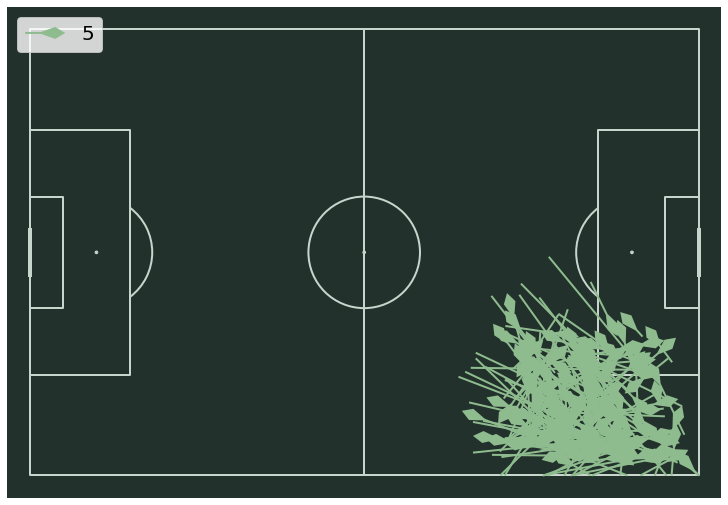

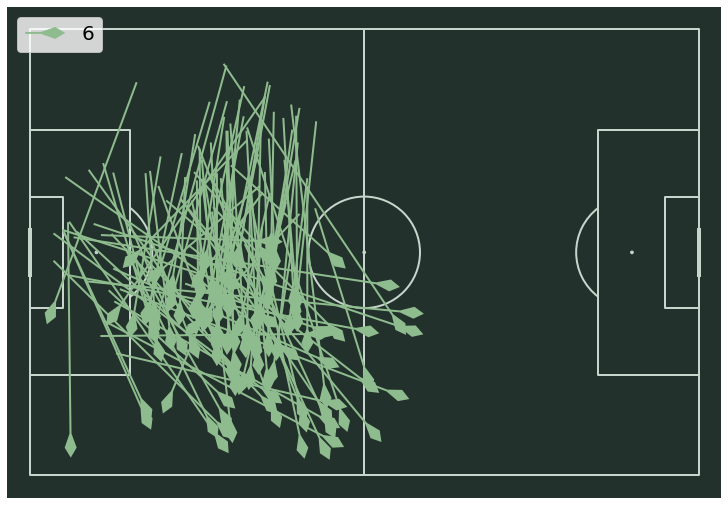

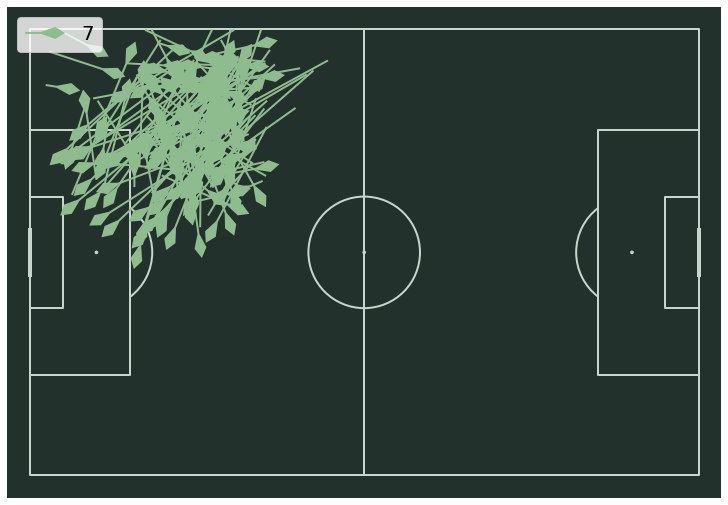

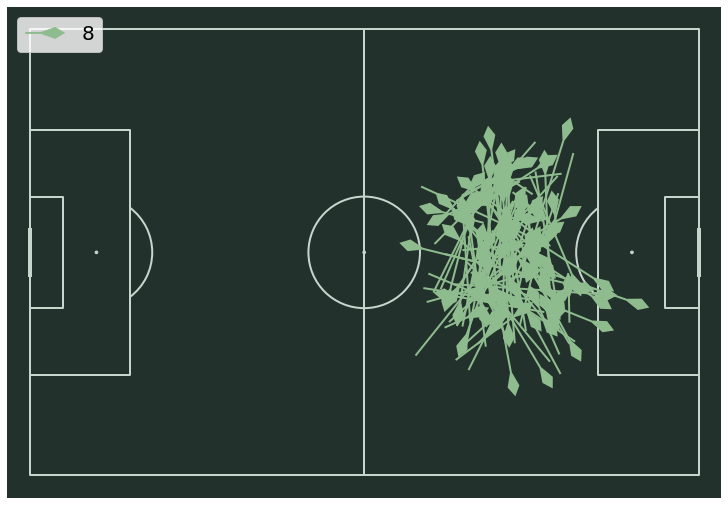

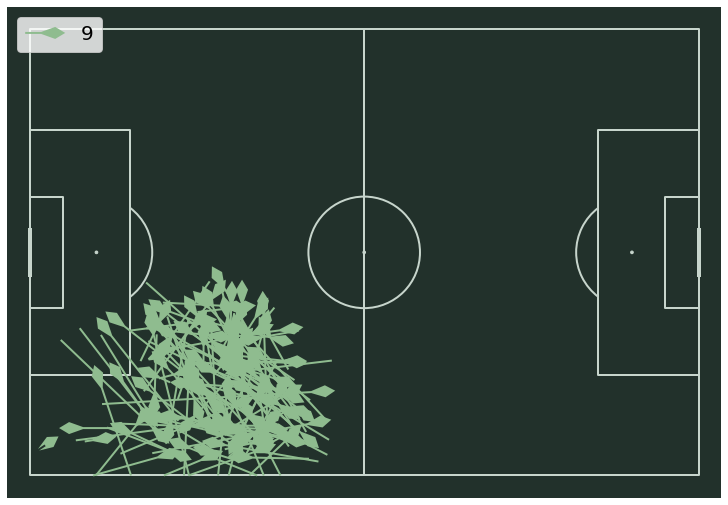

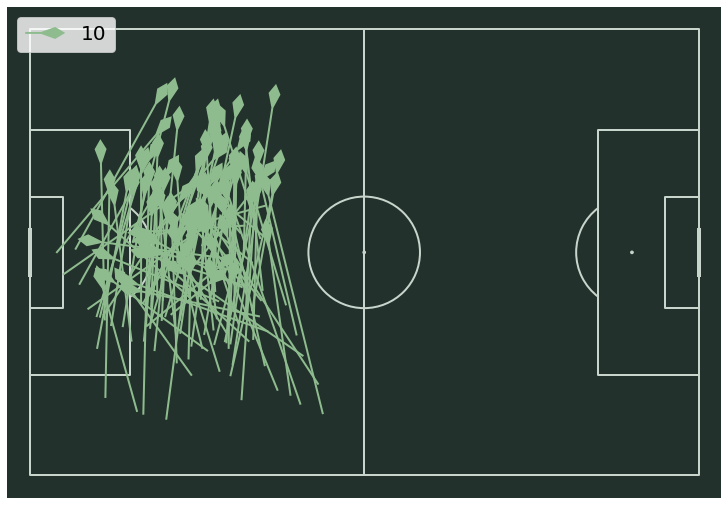

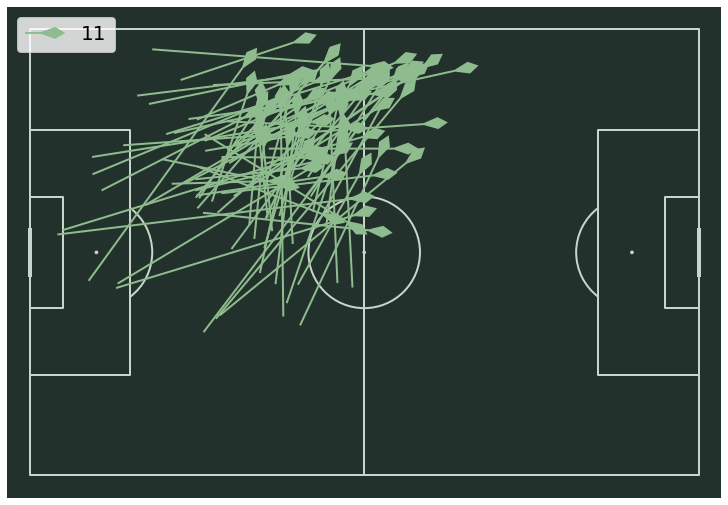

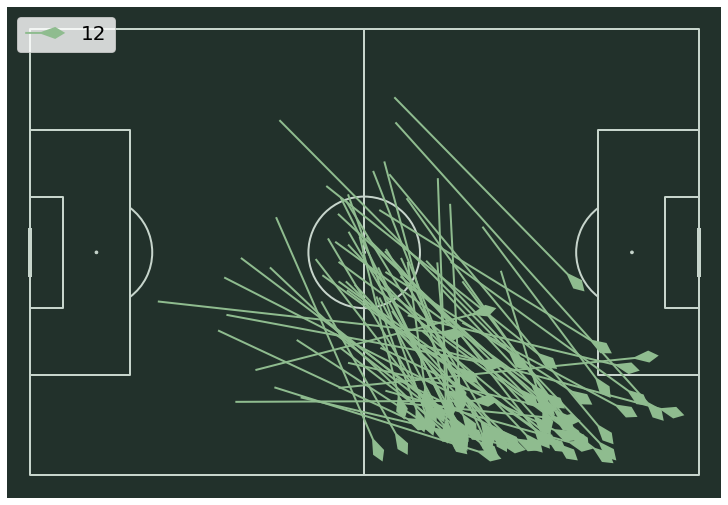

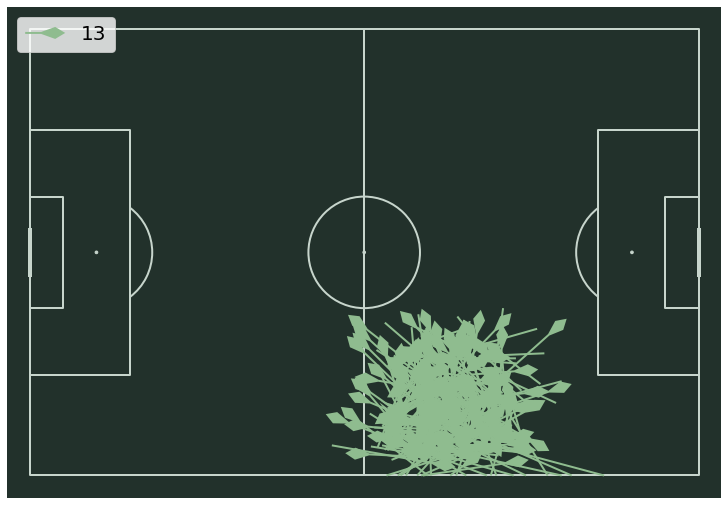

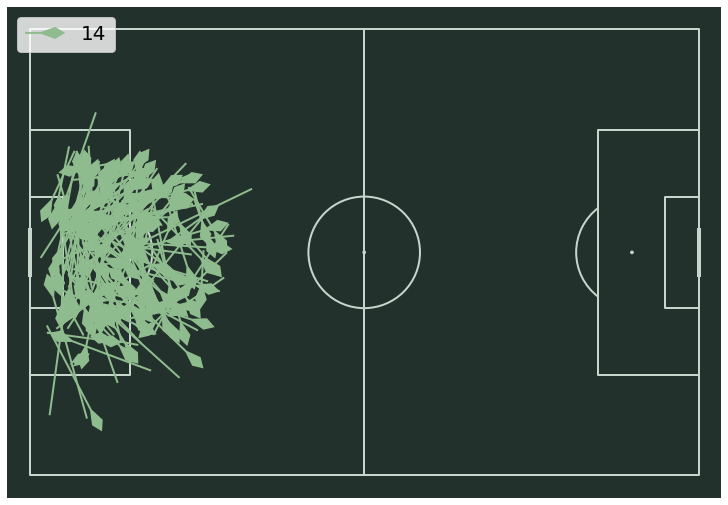

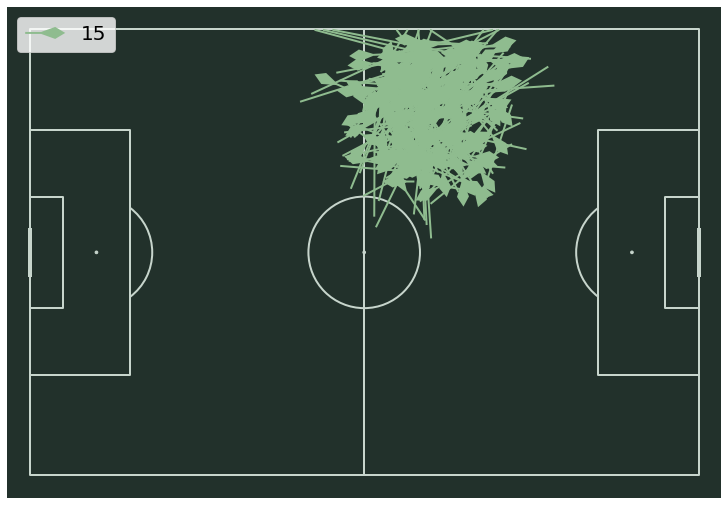

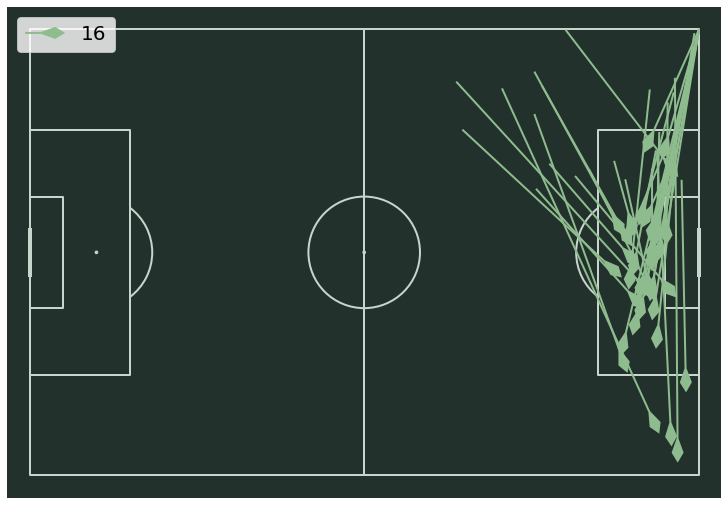

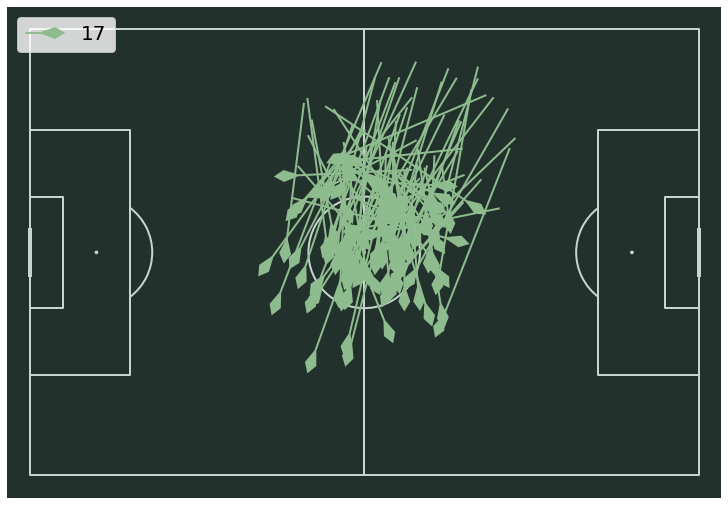

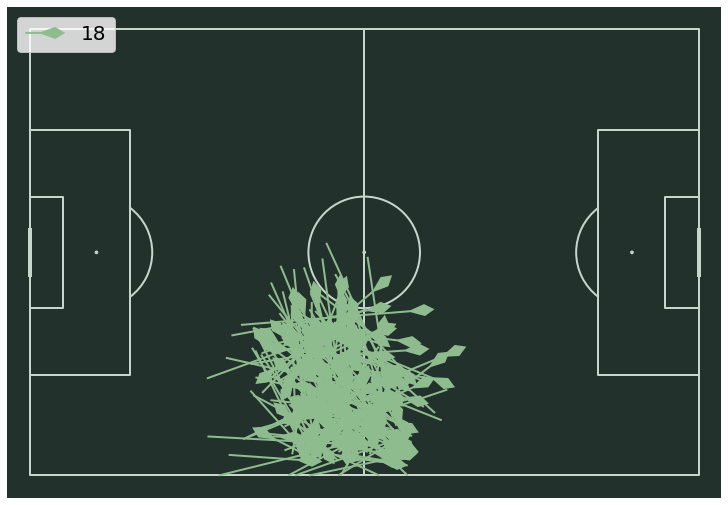

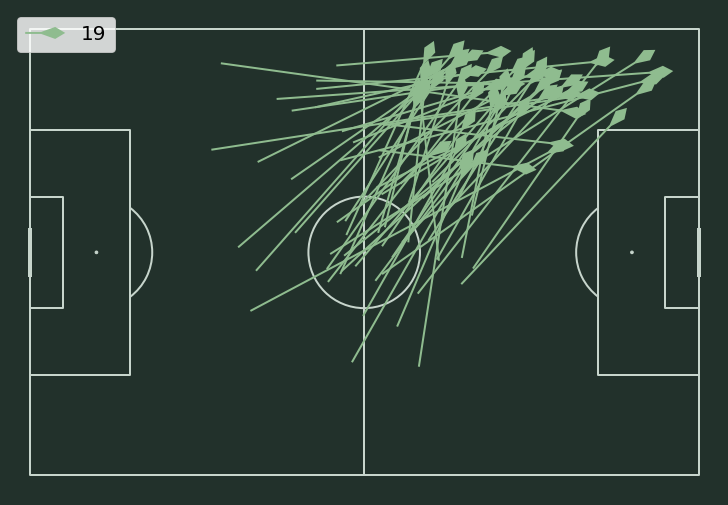

In [77]:
# pulling out passes for analysis by cluster

for c in sorted(eupasses['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(eupasses[eupasses['n_cluster'] == c]['start_x'], 
                      eupasses[eupasses['n_cluster'] == c]['start_y'],
                      eupasses[eupasses['n_cluster'] == c]['end_x'],
                      eupasses[eupasses['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='darkseagreen',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Lucy Bronze made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [78]:
def pass_analysis(cluster,df):
    df = df[df.n_cluster == cluster]
    
    analysis = euro22.iloc[df.index]
    
    return analysis

In [91]:
silhouette_score(X, cluster_labels)

0.22272935562662483